### Guidelines:
- Use functional API

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [ ]:
raw_csv_data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Intro To AI/Assignment 3/CustomerChurn_dataset.csv')
raw_csv_data

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
raw_csv_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = raw_csv_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Dropping the customerID because it is irrelevant to the Churn

In [ ]:
df.drop(['customerID'], axis = 1, inplace = True)

## Encoding and Extracting Relevant Features

### Searching for relevant featues which can predict churn

#### Checking for the distinct entries for each feature

In [ ]:
count = 0
for x in df:
  if len(df[x].unique()) <5:
    count = count+len(df[x].unique())
  print(x + ":", df[x].unique(), ", length:",len(df[x].unique()) ,'\n')
print("Count: ",count)

gender: ['Female' 'Male'] , length: 2 

SeniorCitizen: [0 1] , length: 2 

Partner: ['Yes' 'No'] , length: 2 

Dependents: ['No' 'Yes'] , length: 2 

tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] , length: 73 

PhoneService: ['No' 'Yes'] , length: 2 

MultipleLines: ['No phone service' 'No' 'Yes'] , length: 3 

InternetService: ['DSL' 'Fiber optic' 'No'] , length: 3 

OnlineSecurity: ['No' 'Yes' 'No internet service'] , length: 3 

OnlineBackup: ['Yes' 'No' 'No internet service'] , length: 3 

DeviceProtection: ['No' 'Yes' 'No internet service'] , length: 3 

TechSupport: ['No' 'Yes' 'No internet service'] , length: 3 

StreamingTV: ['No' 'Yes' 'No internet service'] , length: 3 

StreamingMovies: ['No' 'Yes' 'No internet service'] , length: 3 

Contract: ['Month-to-month' 'One year' 'Two year'] , lengt

#### Everything is one-hot encoded except the already numeric values and the contract (label encoded)

In [ ]:
# Create a copy of the original dataset
encoded_df = df.copy()

# Define a function to perform one-hot encoding for binary features
def one_hot_encode(df, column_name):
    encoded = pd.get_dummies(df[column_name], prefix=column_name)
    return encoded

# Define a function to convert a column to numeric (float)
def convert_to_numeric(df, column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    return df

# Change 0 to 'No' and 1 to 'Yes' in the 'SeniorCitizen' feature
encoded_df['SeniorCitizen'] = encoded_df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})


# Gender, SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling: One-hot encoding
binary_features = ['Churn','Contract','gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
                   'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies','PaymentMethod']

# Create a new DataFrame for one-hot encoded features
one_hot_encoded_df = pd.DataFrame()

for feature in binary_features:
    one_hot_encoded_df = pd.concat([one_hot_encoded_df, one_hot_encode(encoded_df, feature)], axis=1)

# Drop the original columns that were one-hot encoded
encoded_df = encoded_df.drop(binary_features, axis=1)


# Convert TotalCharges to numeric (float)
encoded_df = convert_to_numeric(encoded_df, 'TotalCharges')

# Now, replace the original columns with the one-hot encoded versions
encoded_df = pd.concat([encoded_df, one_hot_encoded_df], axis=1)

# Now, 'encoded_df' contains only the features with the appropriate encodings while 'df' remains unchanged.


In [ ]:
encoded_df.head()

,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,34,56.95,1889.50,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,45,42.30,1840.75,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0
4,2,70.70,151.65,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn_No                                 7043 non-null   uint8  
 4   Churn_Yes                                7043 non-null   uint8  
 5   Contract_Month-to-month                  7043 non-null   uint8  
 6   Contract_One year                        7043 non-null   uint8  
 7   Contract_Two year                        7043 non-null   uint8  
 8   gender_Female                            7043 non-null   uint8  
 9   gender_Male                              7043 non-null   uint8  
 10  SeniorCitizen_No                         7043 no

In [ ]:
df = encoded_df.copy()
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,34,56.95,1889.50,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,45,42.30,1840.75,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0
4,2,70.70,151.65,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn_No                                 7043 non-null   uint8  
 4   Churn_Yes                                7043 non-null   uint8  
 5   Contract_Month-to-month                  7043 non-null   uint8  
 6   Contract_One year                        7043 non-null   uint8  
 7   Contract_Two year                        7043 non-null   uint8  
 8   gender_Female                            7043 non-null   uint8  
 9   gender_Male                              7043 non-null   uint8  
 10  SeniorCitizen_No                         7043 no

#### Total charges now has 7032 records instead of 7043, hence imputing is required

In [ ]:
from sklearn.impute import SimpleImputer

feature_to_impute = 'TotalCharges'

# Create a SimpleImputer instance
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median' or 'most_frequent'

# Impute the missing values in the selected feature
df[feature_to_impute] = imputer.fit_transform(df[[feature_to_impute]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7043 non-null   float64
 3   Churn_No                                 7043 non-null   uint8  
 4   Churn_Yes                                7043 non-null   uint8  
 5   Contract_Month-to-month                  7043 non-null   uint8  
 6   Contract_One year                        7043 non-null   uint8  
 7   Contract_Two year                        7043 non-null   uint8  
 8   gender_Female                            7043 non-null   uint8  
 9   gender_Male                              7043 non-null   uint8  
 10  SeniorCitizen_No                         7043 no

#### Correlation Analysis

In [ ]:
import pandas as pd

corr = df.corr()
corr['Churn_Yes'].sort_values(ascending=False)

Churn_Yes                                  1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen_Yes                          0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Femal

In [ ]:
corr['Churn_No'].sort_values(ascending=False)

Churn_No                                   1.000000
tenure                                     0.352229
Contract_Two year                          0.302253
StreamingTV_No internet service            0.227890
OnlineSecurity_No internet service         0.227890
OnlineBackup_No internet service           0.227890
DeviceProtection_No internet service       0.227890
TechSupport_No internet service            0.227890
InternetService_No                         0.227890
StreamingMovies_No internet service        0.227890
TotalCharges                               0.199428
PaperlessBilling_No                        0.191825
Contract_One year                          0.177820
OnlineSecurity_Yes                         0.171226
TechSupport_Yes                            0.164674
Dependents_Yes                             0.164221
SeniorCitizen_No                           0.150889
Partner_Yes                                0.150448
PaymentMethod_Credit card (automatic)      0.134302
InternetServ

Isolating Features which had a high correlation of 0.2 and above

In [ ]:
temp = corr[abs(corr['Churn_Yes']) > 0.20]['Churn_Yes']
temp

tenure                                 -0.352229
Churn_No                               -1.000000
Churn_Yes                               1.000000
Contract_Month-to-month                 0.405103
Contract_Two year                      -0.302253
InternetService_Fiber optic             0.308020
InternetService_No                     -0.227890
OnlineSecurity_No                       0.342637
OnlineSecurity_No internet service     -0.227890
OnlineBackup_No                         0.268005
OnlineBackup_No internet service       -0.227890
DeviceProtection_No                     0.252481
DeviceProtection_No internet service   -0.227890
TechSupport_No                          0.337281
TechSupport_No internet service        -0.227890
StreamingTV_No internet service        -0.227890
StreamingMovies_No internet service    -0.227890
PaymentMethod_Electronic check          0.301919
Name: Churn_Yes, dtype: float64

#### Dropping all other features with no internet service because they all depend on the InternetService_No feature.

In [ ]:
features_to_drop = ['StreamingMovies_No internet service','StreamingTV_No internet service','TechSupport_No internet service','DeviceProtection_No internet service','OnlineBackup_No internet service','OnlineSecurity_No internet service']
selected_features = temp.index.to_list()
for element in features_to_drop:
        selected_features.remove(element)
selected_features

# tenure                                 -0.352229
# Contract_Month-to-month                 0.405103
# Contract_Two year                      -0.302253
# InternetService_Fiber optic             0.308020
# InternetService_No                     -0.227890
# OnlineSecurity_No                       0.342637
# OnlineBackup_No                         0.268005
# DeviceProtection_No                     0.252481
# TechSupport_No                          0.337281
# PaymentMethod_Electronic check          0.301919

['tenure',
 'Churn_No',
 'Churn_Yes',
 'Contract_Month-to-month',
 'Contract_Two year',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineBackup_No',
 'DeviceProtection_No',
 'TechSupport_No',
 'PaymentMethod_Electronic check']

In [ ]:
len(selected_features)
# Selected features so far are actually 10, but Churn_No and Churn_Yes are included because they will be used in training the model

12

#### Scaling the data to use other feature selection methods

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data = df.copy()
scaler = StandardScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.994971,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0.066327,-0.259629,-0.173876,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
2,-1.236724,-0.362660,-0.960399,0,1,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0.514251,-0.746535,-0.195400,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0
4,-1.236724,0.197365,-0.941193,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
count = 0
for x in data:
  if len(df[x].unique()) <5:
    count = count+len(df[x].unique())
  print(x + ":", data[x].unique(), ", length:",len(data[x].unique()) ,'\n')
print("Count: ",count)

tenure: [-1.27744458  0.06632742 -1.23672422  0.51425142 -0.99240204 -0.42231695
 -0.91096131 -0.17799476  1.2064976  -0.78880022 -0.66663913  1.04361615
  0.67713287 -0.30015585  1.49154015  0.79929397  1.57298088 -0.46303731
 -0.82952058 -0.09655404  0.59569215  1.61370124 -0.62591876 -0.21871513
 -1.11456313  0.55497178 -0.87024095  1.53226051  1.24721797  0.43281069
 -0.70735949  1.12505688 -0.5851984   1.36937906 -0.95168167 -1.19600386
 -0.05583367  0.71785324  1.28793833  0.96217542 -1.0331224   0.39209033
  0.10704778  0.63641251 -0.1372744   1.32865869  0.22920887  1.45081979
 -0.01511331  0.92145506  0.18848851  0.14776815  0.35136997 -1.07384277
 -1.15528349  0.02560706  1.41009942 -0.38159658  1.00289578  1.16577724
 -0.74807986 -0.50375767  0.84001433  0.3106496   1.08433651 -0.34087622
  0.47353106 -0.54447804  0.88073469  0.7585736  -0.25943549 -1.31816495
  0.26992924] , length: 73 

MonthlyCharges: [-1.16032292 -0.25962894 -0.36266036 ... -0.05522791 -0.68338718
  0.46

#### Feature selection via future importance with random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the one-hot encoded features
# Assuming 'Churn' is the target variable

# Split the data into features and target
X = data.drop(columns = ['Churn_No','Churn_Yes'], axis=1)
y = data['Churn_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_


feature_importances
# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df


,Feature,Importance
2,TotalCharges,0.161855
1,MonthlyCharges,0.138837
0,tenure,0.137876
3,Contract_Month-to-month,0.052674
24,OnlineSecurity_No,0.030783
44,PaymentMethod_Electronic check,0.025736
33,TechSupport_No,0.024280
22,InternetService_Fiber optic,0.023355
27,OnlineBackup_No,0.019852
7,gender_Male,0.018051


- Adding Total Charges to the selected features because it has a higher feature importance with the Random Forest Calassifier.
- Ignoring Monthly charges because it is what forms the total charges.
- All features selected from correlation analysis had high feature importances from the random forest classifier

In [ ]:
selected_features.append('TotalCharges')
print(len(selected_features))
selected_features

13


['tenure',
 'Churn_No',
 'Churn_Yes',
 'Contract_Month-to-month',
 'Contract_Two year',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineBackup_No',
 'DeviceProtection_No',
 'TechSupport_No',
 'PaymentMethod_Electronic check',
 'TotalCharges']

#### Further Confirmation of feature selection using Recursive Feature Elimination with Cross-Validation (RFECV) with a RandomForestClassifier
- RFECV performs recursive feature elimination while using cross-validation to evaluate the performance of different feature subsets.

In [ ]:
from sklearn.feature_selection import RFECV
# RFECV object
rfecv = RFECV(estimator=rf_classifier, step=1, cv=10, scoring='accuracy')

rfecv.fit(X_train, y_train)

# elected features
rfecv_selected_features = X_train.columns[rfecv.support_]


optimal_num_features = rfecv.n_features_
support_mask = rfecv.support_
rfecv_selected_features = X.columns[support_mask]

rfecv_selected_features

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month',
       'gender_Female', 'gender_Male', 'SeniorCitizen_No', 'Partner_No',
       'Dependents_No', 'PaperlessBilling_Yes', 'MultipleLines_No',
       'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No',
       'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'PaymentMethod_Electronic check'],
      dtype='object')

In [ ]:
len(rfecv_selected_features)

19

In [ ]:
# Printing the actual already selected
selected_features

['tenure',
 'Churn_No',
 'Churn_Yes',
 'Contract_Month-to-month',
 'Contract_Two year',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineBackup_No',
 'DeviceProtection_No',
 'TechSupport_No',
 'PaymentMethod_Electronic check',
 'TotalCharges']

It can be seen that all features selected thus far are among the features selected by RFECV also.
- The features which are common to all feature selection methods are maintained

- Total number of actually selected features so far = 11

### Creating a subset of the data containing the relevant featues

In [ ]:
_data = data.copy()
df_selected_features = _data[selected_features]
df_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tenure                          7043 non-null   float64
 1   Churn_No                        7043 non-null   uint8  
 2   Churn_Yes                       7043 non-null   uint8  
 3   Contract_Month-to-month         7043 non-null   uint8  
 4   Contract_Two year               7043 non-null   uint8  
 5   InternetService_Fiber optic     7043 non-null   uint8  
 6   InternetService_No              7043 non-null   uint8  
 7   OnlineSecurity_No               7043 non-null   uint8  
 8   OnlineBackup_No                 7043 non-null   uint8  
 9   DeviceProtection_No             7043 non-null   uint8  
 10  TechSupport_No                  7043 non-null   uint8  
 11  PaymentMethod_Electronic check  7043 non-null   uint8  
 12  TotalCharges                    70

## Identifying customers that churn a lot

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7043 non-null   float64
 3   Churn_No                                 7043 non-null   uint8  
 4   Churn_Yes                                7043 non-null   uint8  
 5   Contract_Month-to-month                  7043 non-null   uint8  
 6   Contract_One year                        7043 non-null   uint8  
 7   Contract_Two year                        7043 non-null   uint8  
 8   gender_Female                            7043 non-null   uint8  
 9   gender_Male                              7043 non-null   uint8  
 10  SeniorCitizen_No                         7043 no

#### Using EDA to find out which customer profiles relate to churning a lot

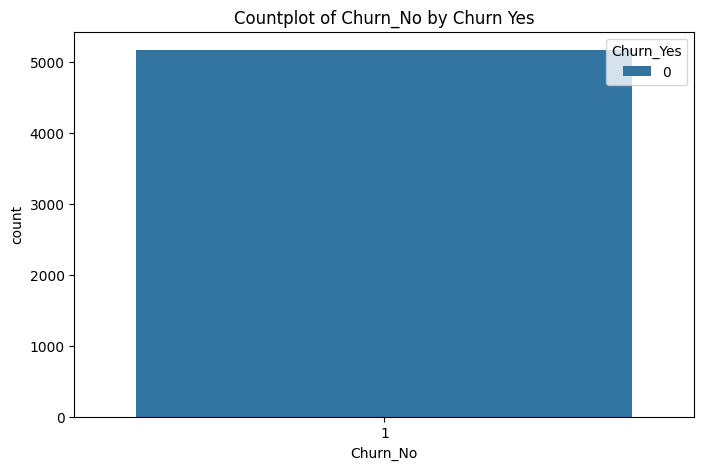

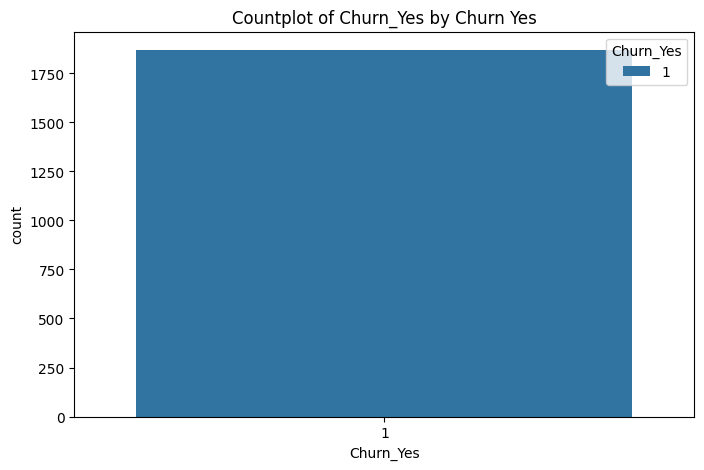

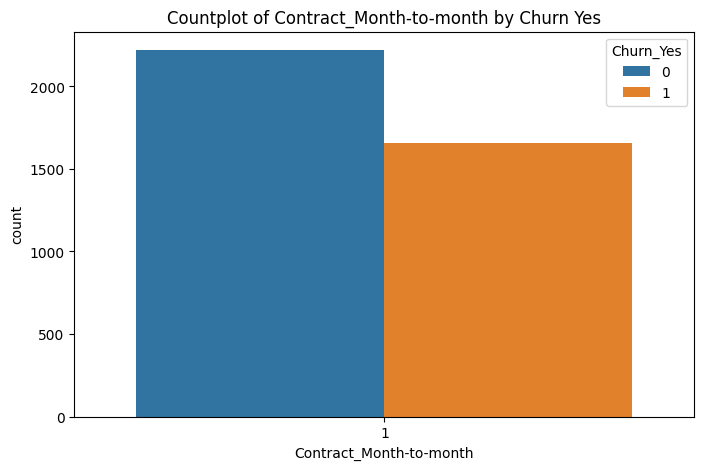

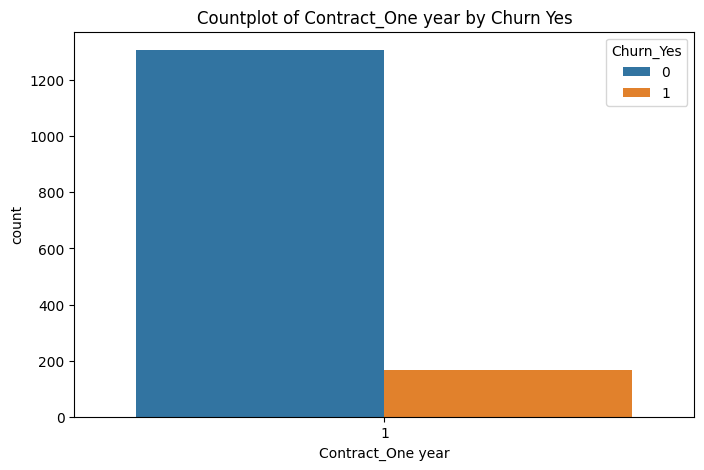

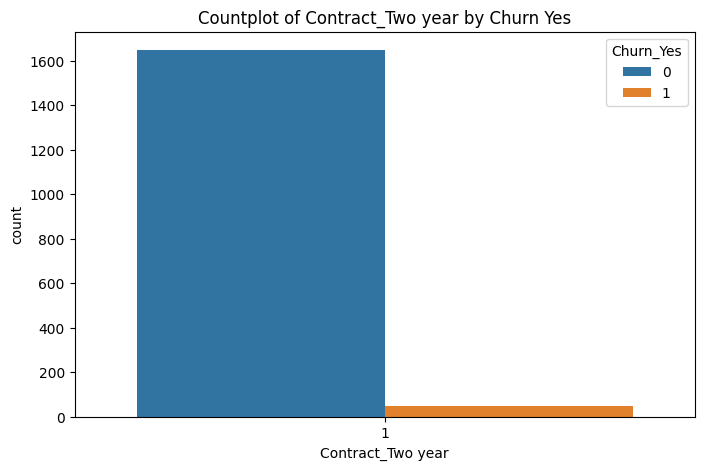

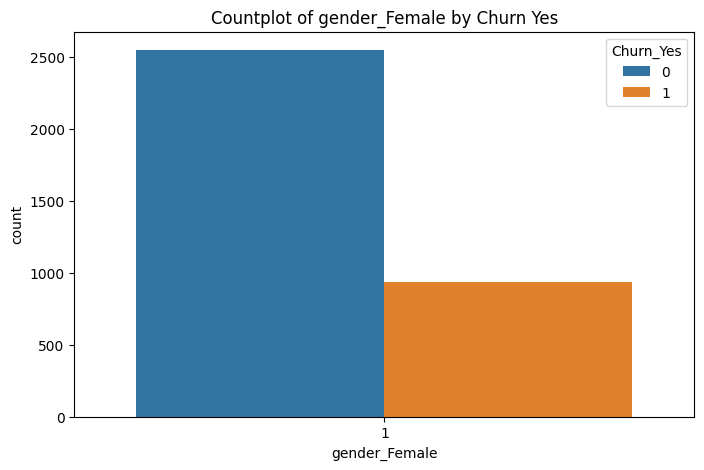

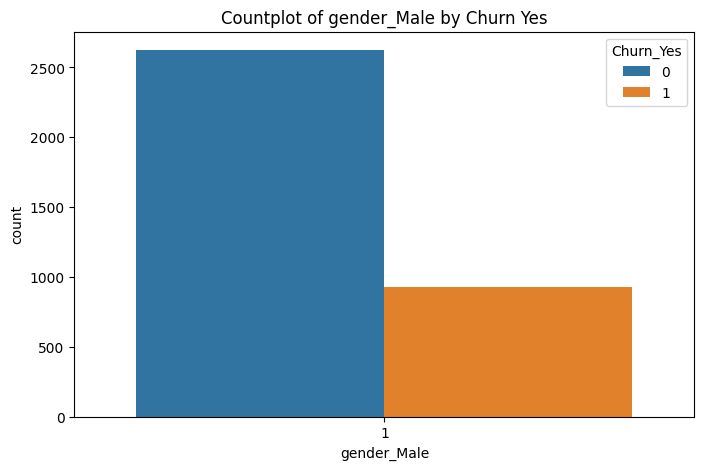

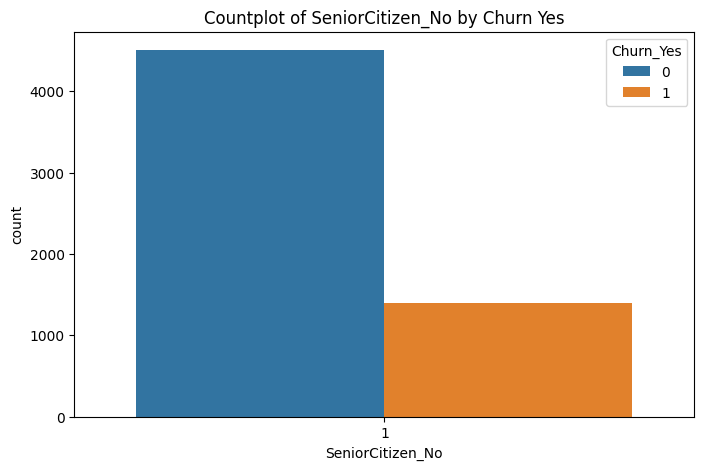

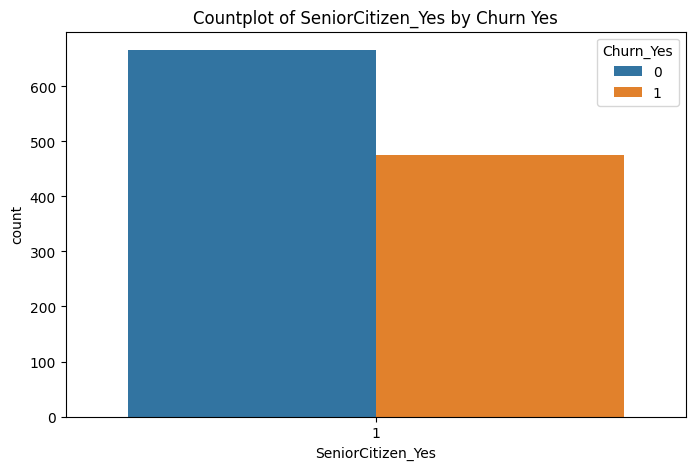

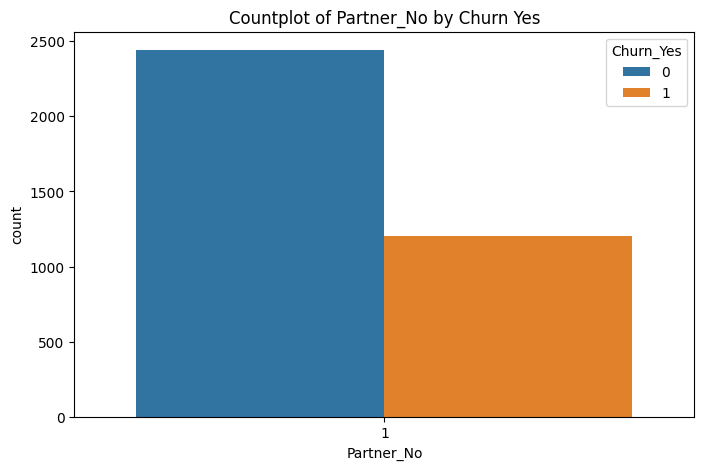

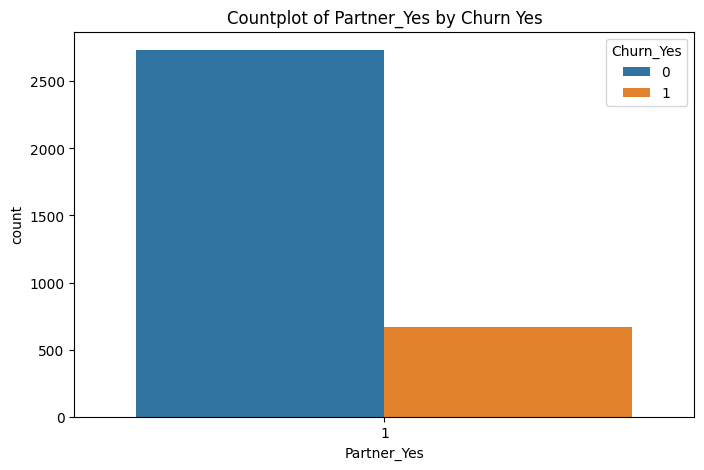

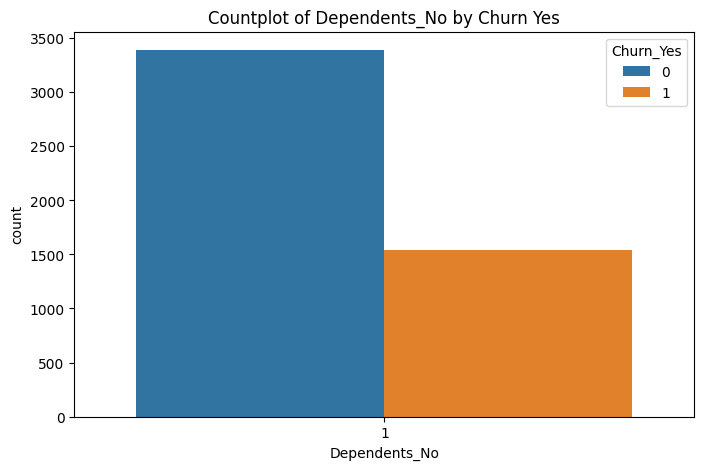

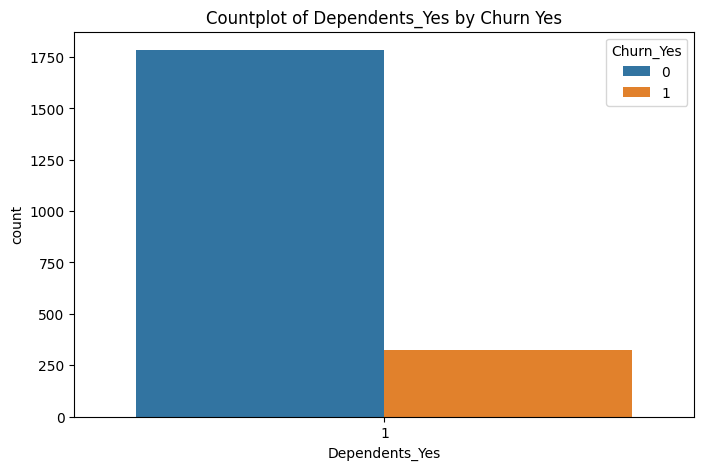

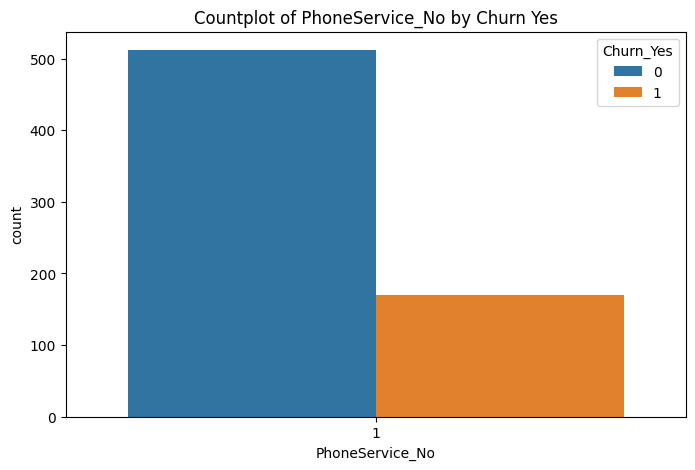

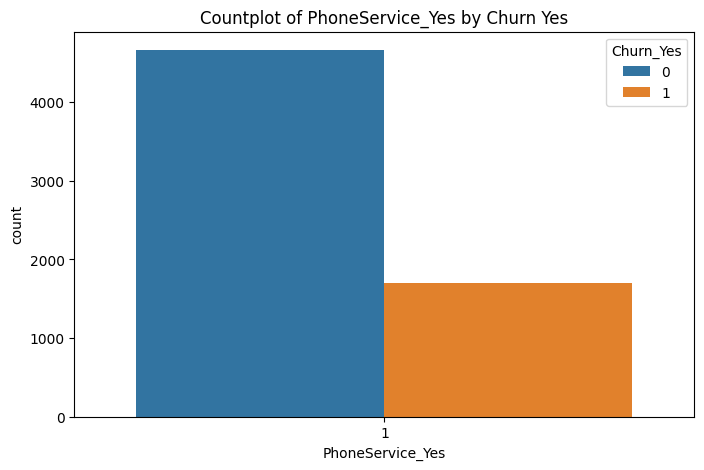

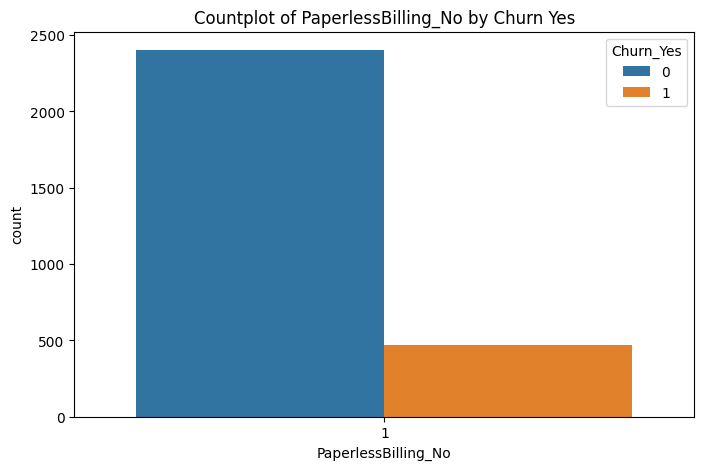

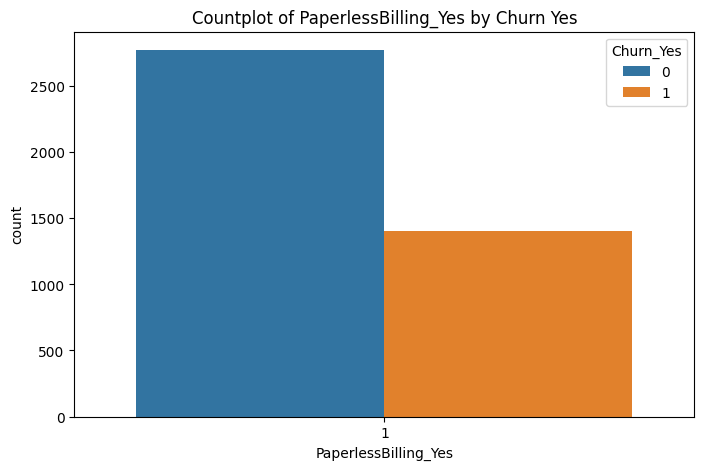

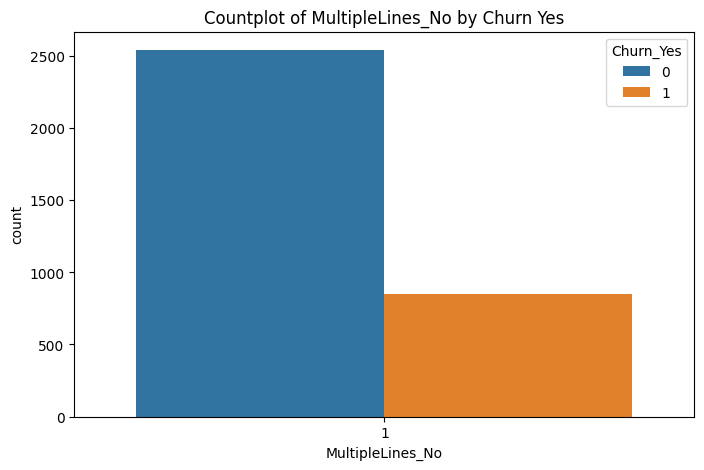

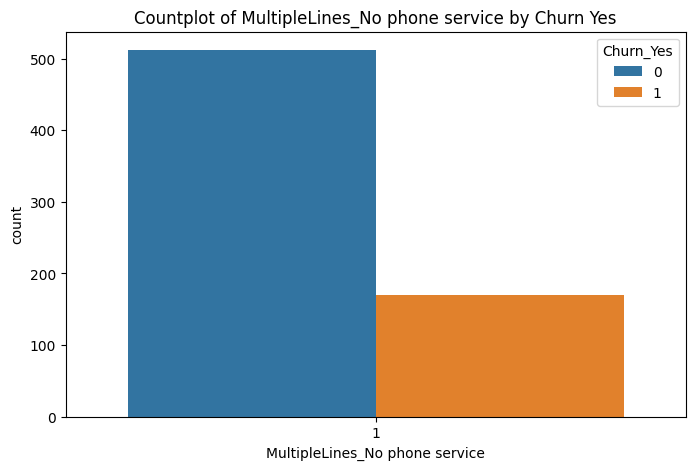

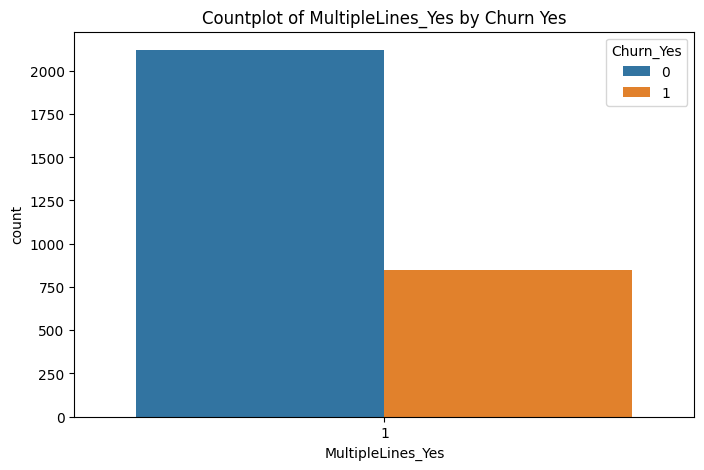

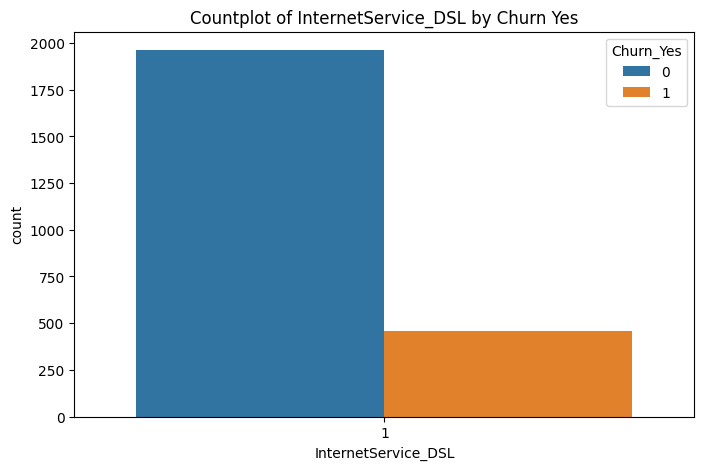

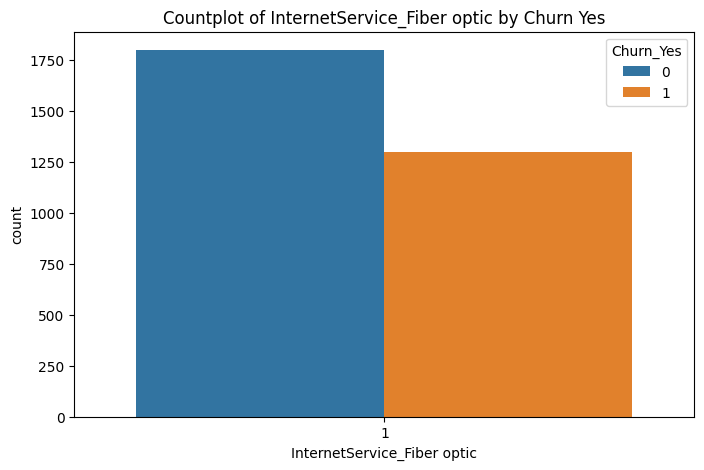

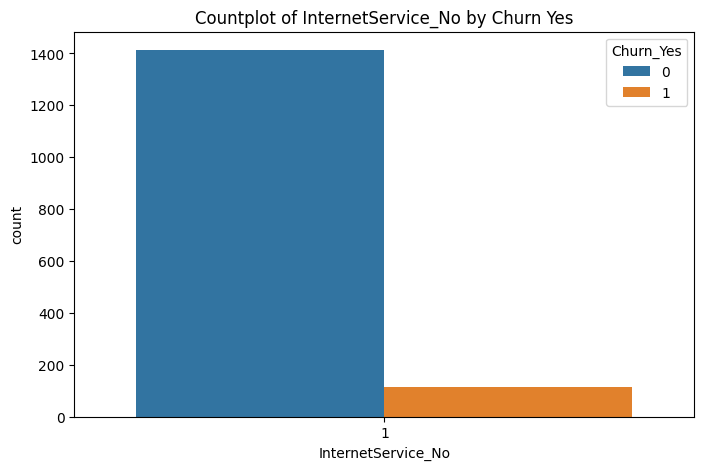

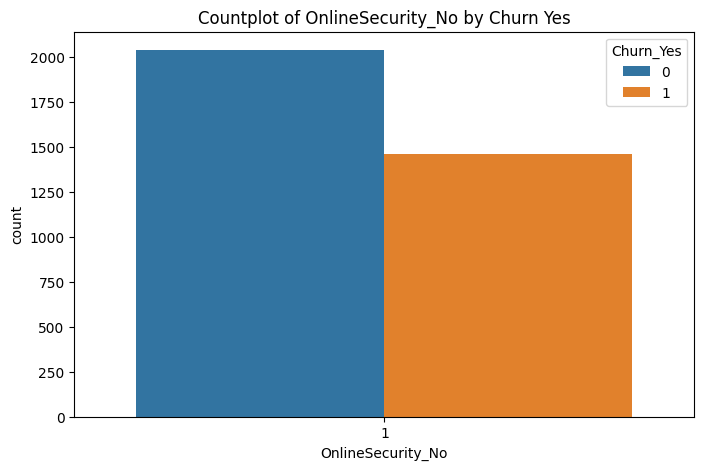

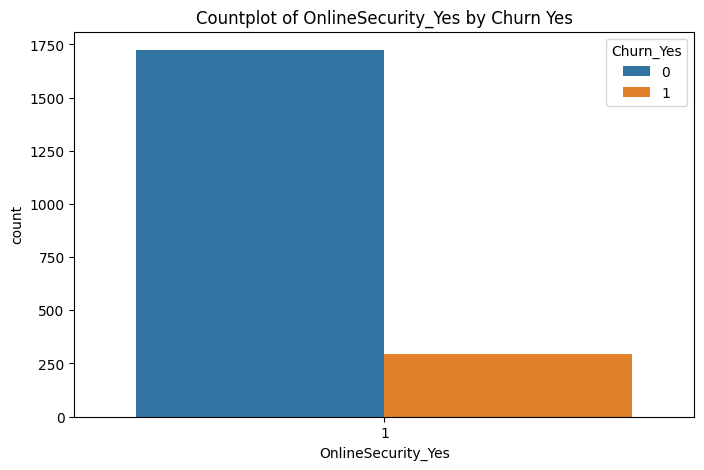

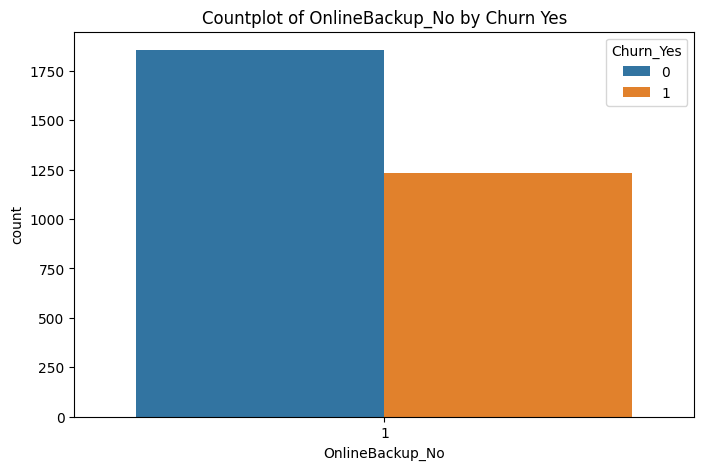

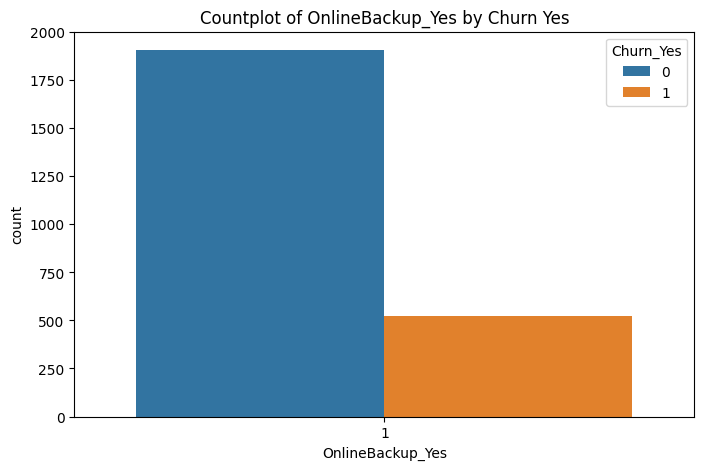

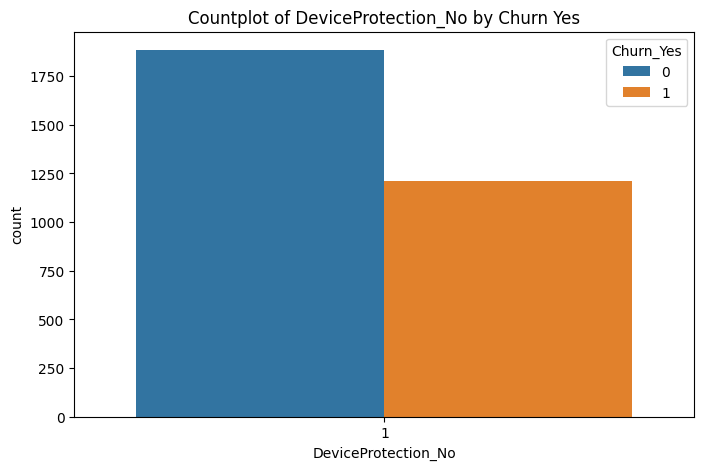

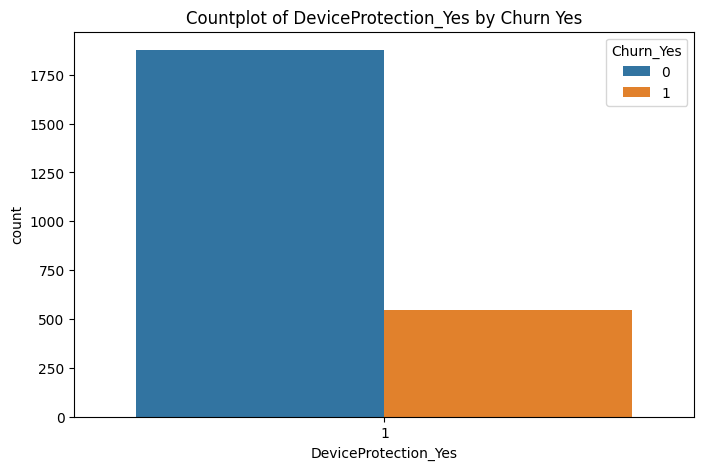

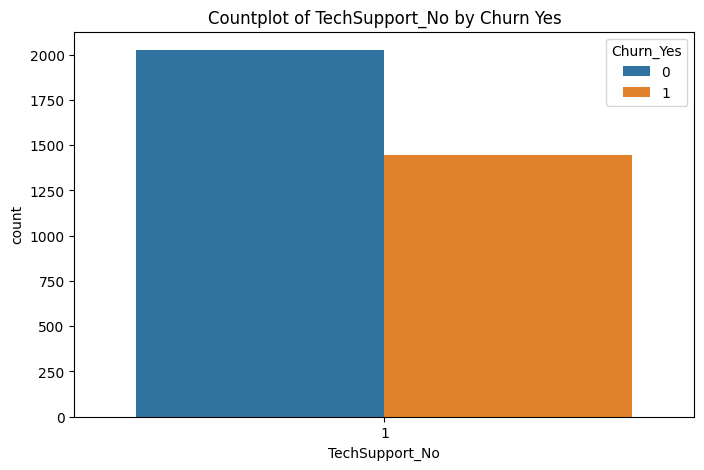

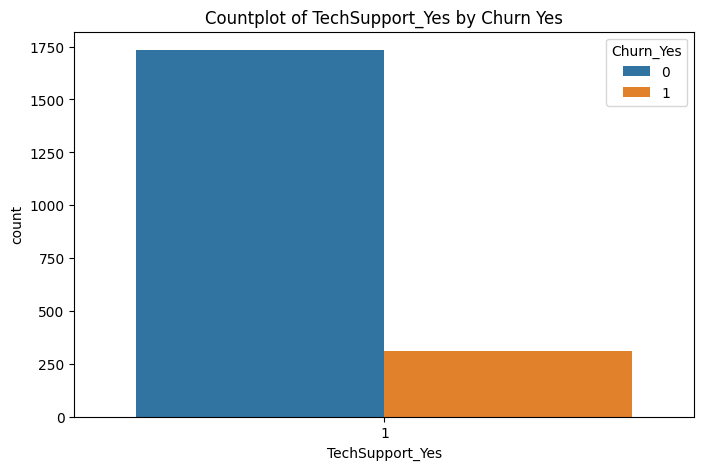

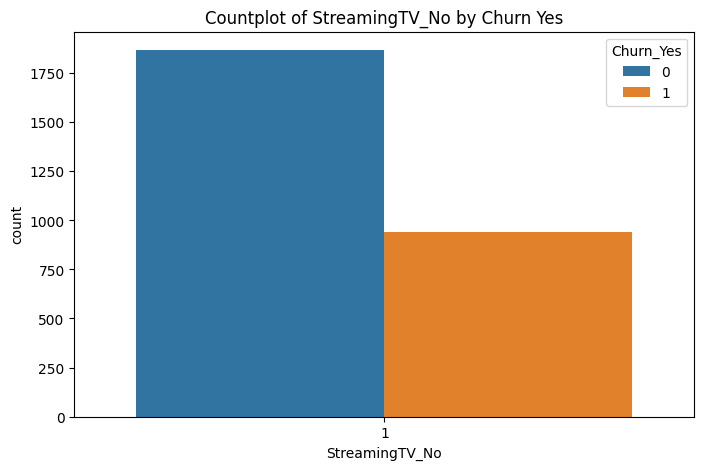

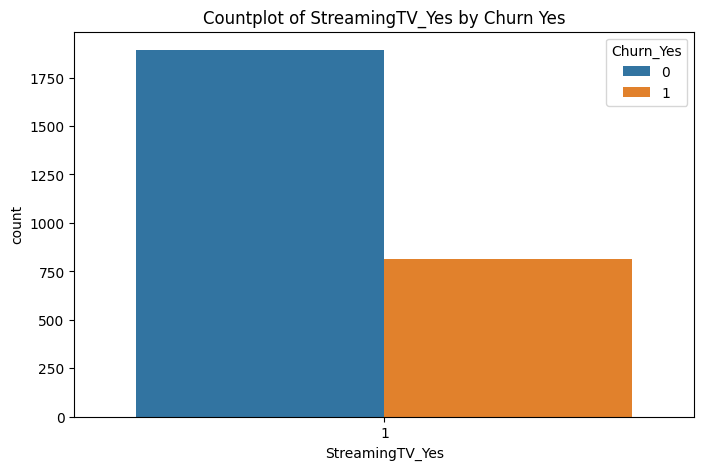

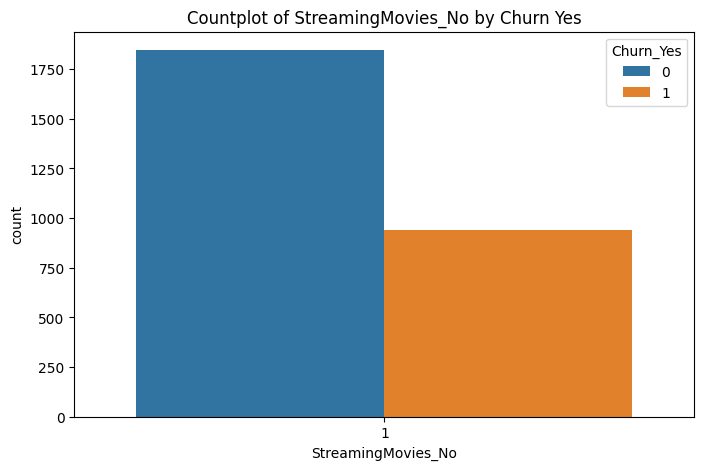

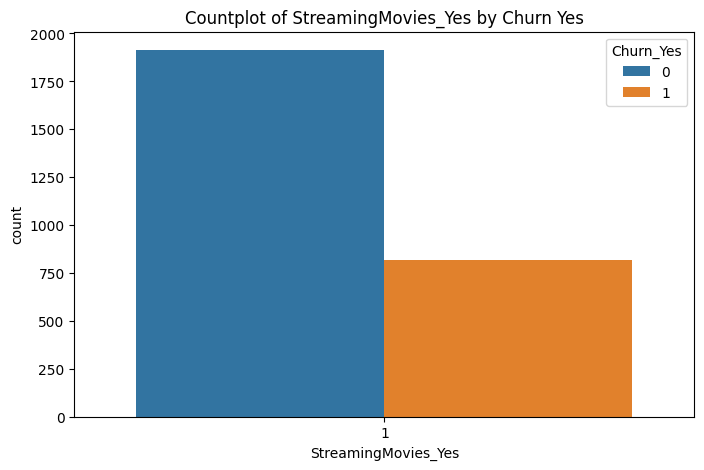

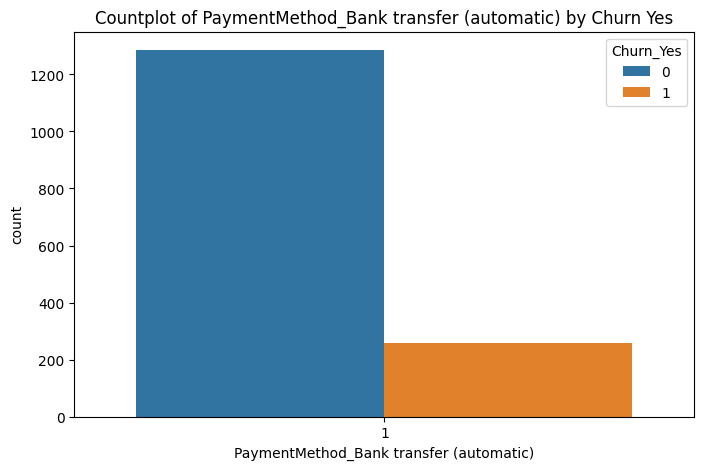

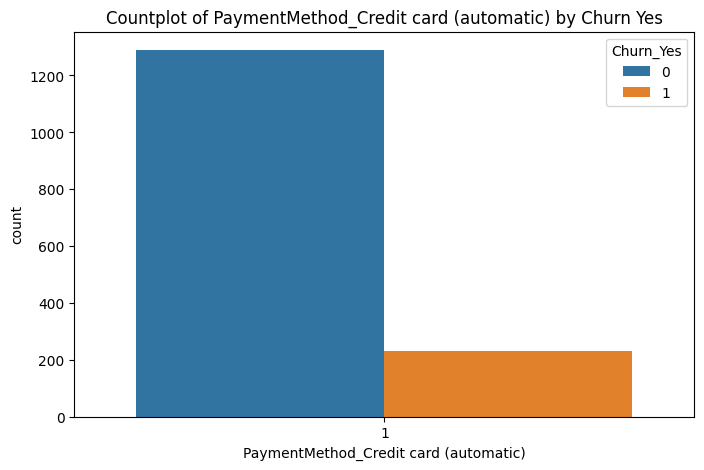

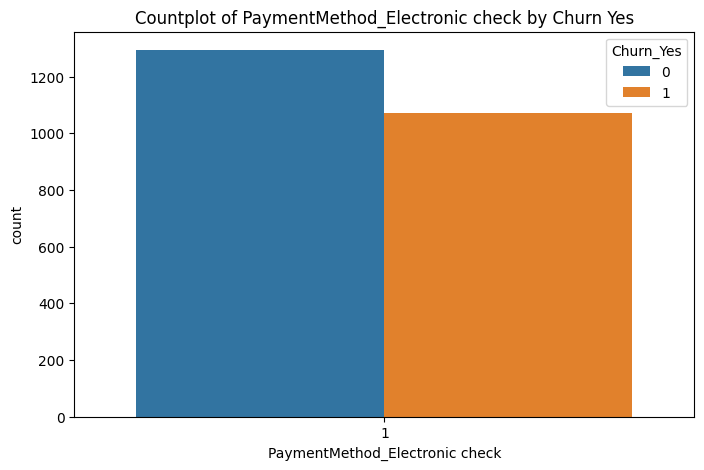

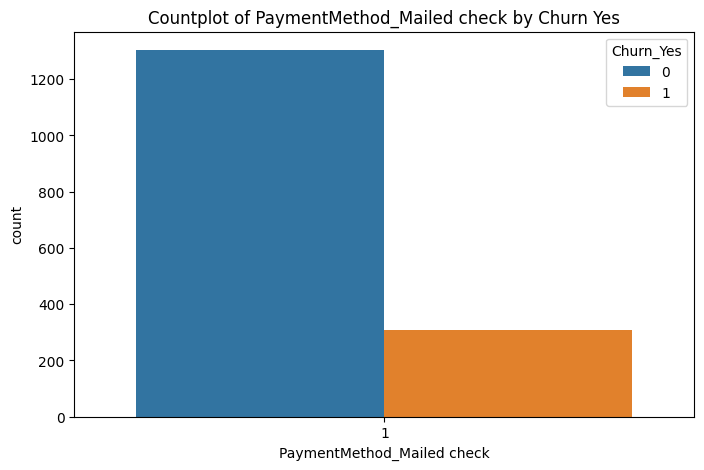

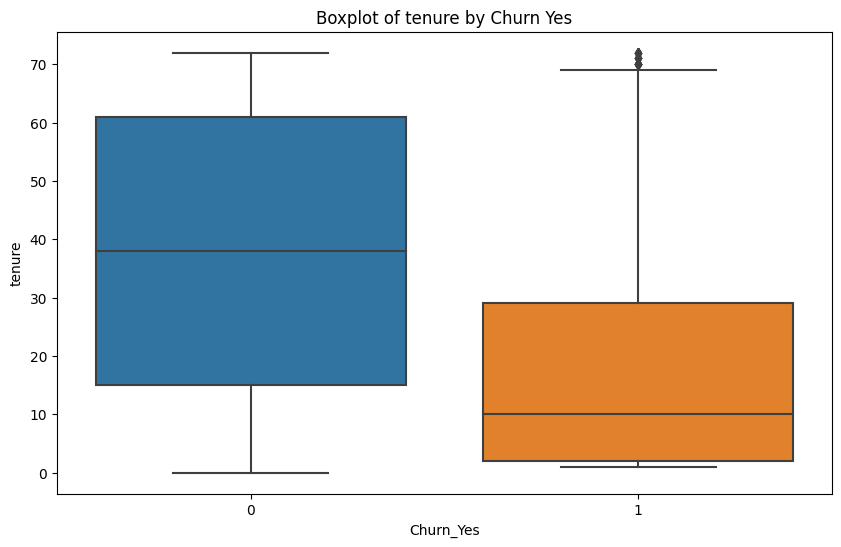

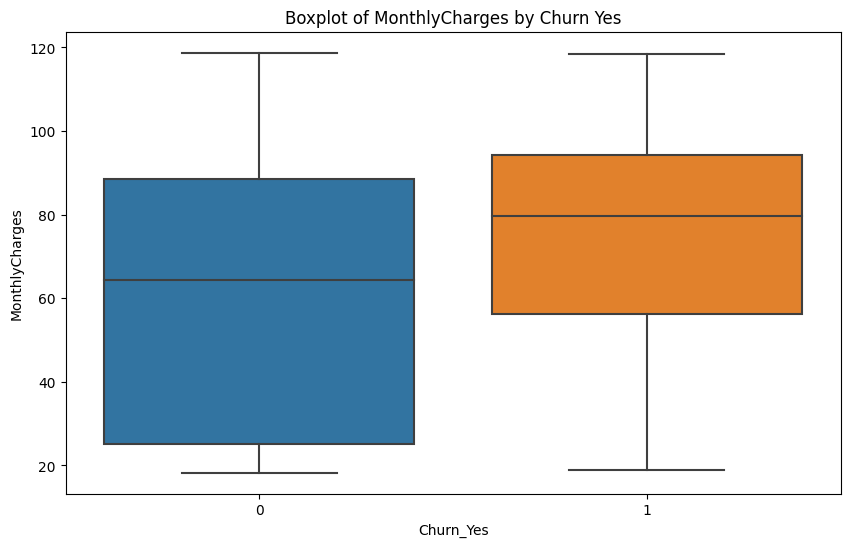

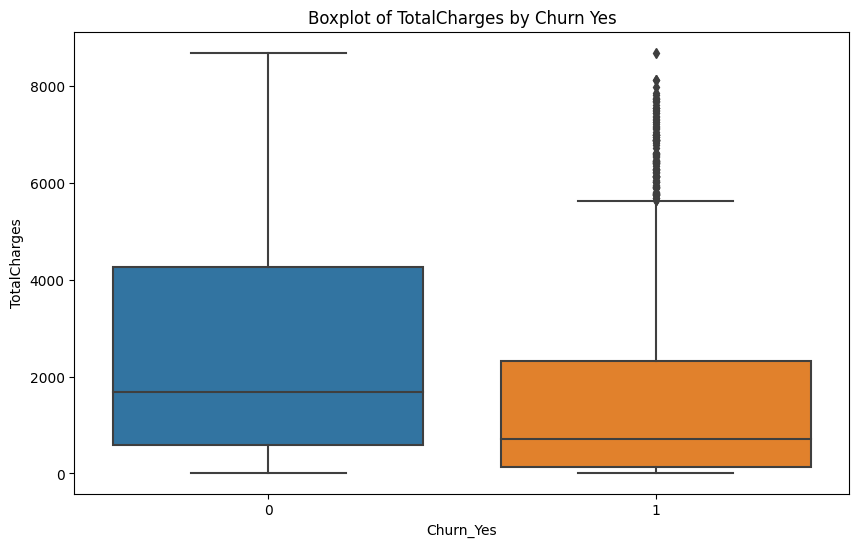

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with encoded features
# Perform EDA on the relevant columns
eda_df = df.copy()

# List of one-hot encoded features
one_hot_encoded_features = ['Churn_No', 'Churn_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
                            'gender_Female', 'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes',
                            'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
                            'PhoneService_No', 'PhoneService_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
                            'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes',
                            'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
                            'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
                            'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
                            'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
                            'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
                            'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# # Bar plots for one-hot encoded features by Churn
# for feature in one_hot_encoded_features:
#     plt.figure(figsize=(8, 5))
#     sns.countplot(x=feature, hue='Churn_Yes', data=eda_df)
#     plt.title(f'Countplot of {feature} by Churn Yes')
#     plt.show()

# Bar plots for one-hot encoded features by Churn
for feature in one_hot_encoded_features:
    # Exclude rows where the one-hot-encoded value is 0
    filtered_df = eda_df[eda_df[feature] == 1]

    # Plot only if there are records where the feature is 1
    if not filtered_df.empty:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=feature, hue='Churn_Yes', data=filtered_df)
        plt.title(f'Countplot of {feature} by Churn Yes')
        plt.show()


# EDA for Numeric Numeric features
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Box plots for numeric features by Churn
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn_Yes', y=feature, data=eda_df)
    plt.title(f'Boxplot of {feature} by Churn Yes')
    plt.show()


#### Resulting from the barcharts and box plots above:

Characteristics of Customes with High Churn:
Pay by Electronic Check, Monthly Contract, No Tech Support, No Online Security, Fiber Optic Internet service, Senior Citizens

Customers with lower churn:
Long term contracts (1 to 2 years), Subscriptions with No internet service, High Tenure


Adding SeniorCitizens and MonthlyCharges to the selected features, since the EDA revealed that they all have high relationship to Churning, and they have been present in past feature selection methods



In [ ]:
selected_features.append("SeniorCitizen_Yes")
selected_features.append("MonthlyCharges")
df_selected_features = _data[selected_features]
df_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tenure                          7043 non-null   float64
 1   Churn_No                        7043 non-null   uint8  
 2   Churn_Yes                       7043 non-null   uint8  
 3   Contract_Month-to-month         7043 non-null   uint8  
 4   Contract_Two year               7043 non-null   uint8  
 5   InternetService_Fiber optic     7043 non-null   uint8  
 6   InternetService_No              7043 non-null   uint8  
 7   OnlineSecurity_No               7043 non-null   uint8  
 8   OnlineBackup_No                 7043 non-null   uint8  
 9   DeviceProtection_No             7043 non-null   uint8  
 10  TechSupport_No                  7043 non-null   uint8  
 11  PaymentMethod_Electronic check  7043 non-null   uint8  
 12  TotalCharges                    70

#### Reordering for the numeric features to be at the front

In [ ]:
df_selected_features.columns.tolist()


['tenure',
 'Churn_No',
 'Churn_Yes',
 'Contract_Month-to-month',
 'Contract_Two year',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineBackup_No',
 'DeviceProtection_No',
 'TechSupport_No',
 'PaymentMethod_Electronic check',
 'TotalCharges',
 'SeniorCitizen_Yes',
 'MonthlyCharges']

Re-ordering columns

In [ ]:
new_order = ['tenure','MonthlyCharges','TotalCharges','Churn_No','Churn_Yes', 'PaymentMethod_Electronic check',
             'SeniorCitizen_Yes', 'Contract_Month-to-month', 'Contract_Two year', 'InternetService_Fiber optic',
             'InternetService_No','OnlineSecurity_No', 'OnlineBackup_No','DeviceProtection_No','TechSupport_No']

df_selected_features = df_selected_features[new_order]
df_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tenure                          7043 non-null   float64
 1   MonthlyCharges                  7043 non-null   float64
 2   TotalCharges                    7043 non-null   float64
 3   Churn_No                        7043 non-null   uint8  
 4   Churn_Yes                       7043 non-null   uint8  
 5   PaymentMethod_Electronic check  7043 non-null   uint8  
 6   SeniorCitizen_Yes               7043 non-null   uint8  
 7   Contract_Month-to-month         7043 non-null   uint8  
 8   Contract_Two year               7043 non-null   uint8  
 9   InternetService_Fiber optic     7043 non-null   uint8  
 10  InternetService_No              7043 non-null   uint8  
 11  OnlineSecurity_No               7043 non-null   uint8  
 12  OnlineBackup_No                 70

There are now 13 Selected featues (excluding Churn_Yes and Churn_No)

## Using the selected features to define and train a Multi-Layer Perceptron model using the Functional API

In [ ]:
df_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tenure                          7043 non-null   float64
 1   MonthlyCharges                  7043 non-null   float64
 2   TotalCharges                    7043 non-null   float64
 3   Churn_No                        7043 non-null   uint8  
 4   Churn_Yes                       7043 non-null   uint8  
 5   PaymentMethod_Electronic check  7043 non-null   uint8  
 6   SeniorCitizen_Yes               7043 non-null   uint8  
 7   Contract_Month-to-month         7043 non-null   uint8  
 8   Contract_Two year               7043 non-null   uint8  
 9   InternetService_Fiber optic     7043 non-null   uint8  
 10  InternetService_No              7043 non-null   uint8  
 11  OnlineSecurity_No               7043 non-null   uint8  
 12  OnlineBackup_No                 70

In [ ]:
from sklearn.model_selection import train_test_split

X = df_selected_features.drop(columns = ['Churn_Yes', "Churn_No"], axis=1)
y = df_selected_features['Churn_Yes']

# Split the data into training (80%), validation (10%), and testing (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score


In [ ]:

# Build the model using the Functional API
input_layer = Input(shape=(X_train.shape[1],), name='input_layer')
hidden_layer1 = Dense(64, activation='relu', name='hidden_layer1')(input_layer)
# hidden_layer2 = Dense(32, activation='relu', name='hidden_layer2')(hidden_layer1)
# hidden_layer3 = Dense(12, activation='relu', name='hidden_layer3')(hidden_layer2)
output_layer = Dense(1, activation='sigmoid', name='output_layer')(hidden_layer1)


# Create the model
initial_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
initial_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
initial_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 13)]              0         
                                                                 
 hidden_layer1 (Dense)       (None, 64)                896       
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Train the model
initial_model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/500
177/177 [==============================] - 1s 4ms/step - loss: 0.6379 - accuracy: 0.6784 - val_loss: 0.5975 - val_accuracy: 0.7372
Epoch 2/500
177/177 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.7412 - val_loss: 0.5465 - val_accuracy: 0.7443
Epoch 3/500
177/177 [==============================] - 0s 2ms/step - loss: 0.5322 - accuracy: 0.7588 - val_loss: 0.5119 - val_accuracy: 0.7770
Epoch 4/500
177/177 [==============================] - 1s 3ms/step - loss: 0.5047 - accuracy: 0.7796 - val_loss: 0.4882 - val_accuracy: 0.7827
Epoch 5/500
177/177 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7867 - val_loss: 0.4718 - val_accuracy: 0.7983
Epoch 6/500
177/177 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7872 - val_loss: 0.4610 - val_accuracy: 0.7997
Epoch 7/500
177/177 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7890 - val_loss: 0.4534 - val_accuracy: 0.8011

In [ ]:
# Evaluate the model on the train set
test_loss, test_accuracy = initial_model.evaluate(X_train, y_train)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

177/177 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8007
Test Loss: 0.4153
Test Accuracy: 0.8007


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = initial_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

23/23 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8170
Test Loss: 0.3834
Test Accuracy: 0.8170


In [ ]:
# Evaluate the final model on the test set
test_preds = initial_model.predict(X_test)
test_preds_binary = (test_preds > 0.5).astype(int)
auc = roc_auc_score(y_test, test_preds_binary)

print(f"Final AUC Score: {auc:.4f}")

23/23 [==============================] - 0s 2ms/step
Final AUC Score: 0.7291


In [ ]:
y_pred = (test_preds > 0.5).astype(int).flatten()

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.92      0.88       519
           1       0.70      0.54      0.61       186

    accuracy                           0.82       705
   macro avg       0.77      0.73      0.75       705
weighted avg       0.81      0.82      0.81       705



In [ ]:
test_preds = initial_model.predict(X_test)
y_pred = (test_preds > 0.5).astype(int).flatten()

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': (test_preds > 0.5).astype(int).flatten()})
# Print the DataFrame
results_df.head()

23/23 [==============================] - 0s 1ms/step


,Actual,Predicted
381,1,0
681,0,0
4127,0,0
6737,0,0
286,0,0


Code to print prediction and confidence

In [ ]:
import numpy as np
tenure = 34
total = 1889.5
monthly = 56.95
s = scaler.transform([[tenure, monthly, total]])
s = s.flatten()
test = initial_model.predict([[s[0],s[1],s[2], 0, 0, 0, 0, 0, 1, 0, 0,1,0]]).flatten()[0]

prediction = (test > 0.5).astype(int).flatten()[0]
if(prediction == 0):
  confidence = np.round((1-test) * 100, 2)
else:
  confidence = np.round(test * 100, 2)

print("Prediction:", prediction, "\nConfidence:", confidence, "%")

1/1 [==============================] - 0s 67ms/step
Prediction: 0 
Confidence: 96.24 %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Fine Tuning, with Keras Tuner

We will have to handle oversampling and its potential bias on the model
There are more non-chrned customes than churned customers

In [ ]:
import numpy as np
print("Original class distribution:", np.bincount(y_train))

Original class distribution: [4138 1496]


In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import keras_tuner
from keras_tuner.tuners import RandomSearch
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from keras.layers import Dropout
from kerastuner.engine import hyperparameters
from kerastuner import Objective
from kerastuner.tuners import Hyperband





<ipython-input-45-d57ba7bb6ed0>:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.engine import hyperparameters


In [ ]:
# Define the oversampling pipeline
over = SMOTE(sampling_strategy=0.5)  # Adjust the sampling_strategy based on your preference
under = RandomUnderSampler(sampling_strategy=1.0)
sampling_pipeline = Pipeline(steps=[('o', over), ('u', under)])

def oversample_data(X, y):
    # Apply oversampling
    X_resampled, y_resampled = sampling_pipeline.fit_resample(X, y)
    return X_resampled, y_resampled

# Oversample the data
X_resampled, y_resampled = oversample_data(X_train, y_train)

In [ ]:
print("Original class distribution:", np.bincount(y_resampled))

Original class distribution: [2069 2069]


In [ ]:

def build_model(hp):
    input_layer = Input(shape=(X_train.shape[1],), name='input_layer')

    # Hidden Layer 1
    hidden_layer1 = Dense(units=hp.Int('units1', min_value=64, max_value=256, step=32), activation='relu', name='hidden_layer1')(input_layer)
    dropout1 = Dropout(rate=hp.Float('dropout1', min_value=0.2, max_value=0.5, step=0.1))(hidden_layer1)

    # # Hidden Layer 2
    # hidden_layer2 = Dense(units=hp.Int('units2', min_value=32, max_value=128, step=20), activation='relu', name='hidden_layer2')(dropout1)
    # dropout2 = Dropout(rate=hp.Float('dropout2', min_value=0.2, max_value=0.5, step=0.1))(hidden_layer2)

    # # Hidden Layer 3
    # hidden_layer3 = Dense(units=hp.Int('units3', min_value=12, max_value=64, step=15), activation='relu', name='hidden_layer3')(dropout2)
    # dropout3 = Dropout(rate=hp.Float('dropout3', min_value=0.2, max_value=0.5, step=0.1))(hidden_layer3)

    # Output Layer
    output_layer = Dense(1, activation='sigmoid', name='output_layer')(dropout1)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-6, max_value=1e-1, sampling='LOG')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


# Instantiate the Keras Tuner Hyperband object
tuner = Hyperband(
    build_model,
    objective='val_accuracy',  # Use accuracy for optimization
    max_epochs=90,  # Maximum number of epochs for training
    factor=3,  # Set the factor for the number of halving rounds
    directory='my_tuner_dir',
    project_name='churn_prediction_smote'
)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)


In [ ]:
# Perform the hyperparameter search using the Keras Tuner with the oversampled data
tuner.search(X_train, y_train, epochs=500, validation_data=(X_val, y_val), callbacks=[early_stopping])


Trial 254 Complete [00h 00m 09s]
val_accuracy: 0.8153409361839294

Best val_accuracy So Far: 0.8210227489471436
Total elapsed time: 00h 27m 25s


##### Evaluating the Best model

In [ ]:
best_model_1 = tuner.get_best_models(num_models=2)[0]
best_model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 13)]              0         
                                                                 
 hidden_layer1 (Dense)       (None, 128)               1792      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 1921 (7.50 KB)
Trainable params: 1921 (7.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate the model on the train set
test_loss, test_accuracy = best_model_1.evaluate(X_train, y_train)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

177/177 [==============================] - 1s 3ms/step - loss: 0.4200 - accuracy: 0.8005
Test Loss: 0.4200
Test Accuracy: 0.8005


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = best_model_1.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

23/23 [==============================] - 0s 5ms/step - loss: 0.3925 - accuracy: 0.8113
Test Loss: 0.3925
Test Accuracy: 0.8113


In [ ]:
# Evaluate the final model on the test set
test_preds = best_model_1.predict(X_test)
test_preds_binary = (test_preds > 0.5).astype(int)
auc = roc_auc_score(y_test, test_preds_binary)

print(f"Final AUC Score: {auc:.4f}")

23/23 [==============================] - 0s 6ms/step
Final AUC Score: 0.7615


In [ ]:
y_pred = (test_preds > 0.5).astype(int).flatten()

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       519
           1       0.64      0.66      0.65       186

    accuracy                           0.81       705
   macro avg       0.76      0.76      0.76       705
weighted avg       0.81      0.81      0.81       705



##### Doing so with the best hyperparameters instead of the best model

In [ ]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values


{'units1': 128,
 'dropout1': 0.2,
 'learning_rate': 0.0038226328599992587,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 4,
 'tuner/round': 2,
 'tuner/trial_id': '0110'}

###### On Normal data

In [ ]:
# Build and train the final model with the best hyperparameters

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

best_model_2 = build_model(best_hps)

best_model_2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/100
177/177 [==============================] - 2s 7ms/step - loss: 0.4572 - accuracy: 0.7812 - val_loss: 0.4294 - val_accuracy: 0.8125
Epoch 2/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4348 - accuracy: 0.7879 - val_loss: 0.4333 - val_accuracy: 0.8097
Epoch 3/100
177/177 [==============================] - 1s 5ms/step - loss: 0.4316 - accuracy: 0.7943 - val_loss: 0.4189 - val_accuracy: 0.8068
Epoch 4/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4299 - accuracy: 0.7938 - val_loss: 0.4201 - val_accuracy: 0.8040
Epoch 5/100
177/177 [==============================] - 1s 5ms/step - loss: 0.4268 - accuracy: 0.7948 - val_loss: 0.4172 - val_accuracy: 0.8026
Epoch 6/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4242 - accuracy: 0.7973 - val_loss: 0.4203 - val_accuracy: 0.8011
Epoch 7/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4229 - accuracy: 0.7961 - val_loss: 0.4273 - val_accuracy: 0.8068

In [ ]:
# Evaluate the model on the train set
test_loss, test_accuracy = best_model_2.evaluate(X_train, y_train)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

177/177 [==============================] - 2s 7ms/step - loss: 0.4168 - accuracy: 0.8023
Test Loss: 0.4168
Test Accuracy: 0.8023


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = best_model_2.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

23/23 [==============================] - 0s 3ms/step - loss: 0.3887 - accuracy: 0.8213
Test Loss: 0.3887
Test Accuracy: 0.8213


In [ ]:
# Evaluate the final model on the test set
final_test_preds = best_model_2.predict(X_test)
final_test_preds_binary = (final_test_preds > 0.5).astype(int)
final_auc = roc_auc_score(y_test, final_test_preds_binary)

print(f"Final AUC Score: {final_auc:.4f}")

23/23 [==============================] - 0s 4ms/step
Final AUC Score: 0.7389


In [ ]:
y_pred = (test_preds > 0.5).astype(int).flatten()

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.87      0.87       519
           1       0.64      0.66      0.65       186

    accuracy                           0.81       705
   macro avg       0.76      0.76      0.76       705
weighted avg       0.81      0.81      0.81       705



## Deployment
Saving relevant data for use in deployment

### Saving the scalar

In [ ]:
import json

# Save the mean and standard deviation to a JSON file
scaler_params = {'mean': scaler.mean_.tolist(), 'std': scaler.scale_.tolist()}

scaler_params

{'mean': [32.37114865824223, 64.76169246059918, 2283.3004408418656],
 'std': [24.55773742286344, 30.087910854936975, 2264.8394541214802]}

In [ ]:
# Save the scalers to a file
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

### Saving the model

It can be seen that the best model is best_model_2, with a test accuracy score of 0.8213

Hence It will be the one to be saved

In [ ]:
import tensorflow as tf

# Save the TensorFlow model
best_model_2.save("best_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
